# The Euro Problem

In [1]:
# Import the helper package
from empiricaldist import Pmf

# Import data analysis packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Our hypotheses model coins with an evenly spaced bias toward heads
# from 0 to 1.
hypos = np.linspace(0, 1, 101)

In [3]:
# Our prior is a sequence from 0 to 1 by 0.01

# Each prior is a fraction, 1/x, where x ranges from 0 (inclusive)
# to 101 (exclusive).
prior = Pmf(1, hypos)

In [4]:
# Additionally, we can use our hypotheses to calculate our likelihoods
# of heads and tails.
likelihood_heads = hypos
likelihood_tails = 1 - hypos

In [5]:
# To make it easy to perform an update, we will put these likelihoods
# into a dictionary.
likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails,
}

In [6]:
# We model our data by a sequence containing 140 "heads" and "110"
# tails.
dataset = 'H' * 140 + 'T' * 110

In [7]:
# We can now perform our update of our probability mass function (PMF).
def update_euro(pmf, dataset):
    """Update `pmf` with a given sequences of 'H' (heads) and 'T' (tails)."""
    for data in dataset:
        pmf *= likelihood[data]

    # When finished, we normalize everything so that the
    # total probability is 1.
    pmf.normalize()

In [8]:
# Now we can finally update our prior with our data to get our posterior.
posterior = prior.copy()
update_euro(posterior, dataset)

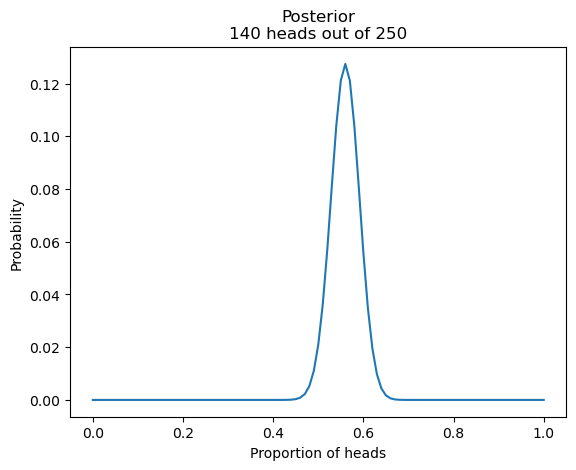

In [9]:
# Here's what the posterior looks like

fig, ax = plt.subplots()
ax.plot(hypos, posterior)

plt.xlabel('Proportion of heads')
plt.ylabel('Probability')
plt.title('Posterior\n140 heads out of 250')

plt.show()

In [10]:
# The most likely value for our proportion of heads is...
posterior.max_prob()

0.56

In [11]:
# We can also calculate a mean and a 90% credible interval
posterior.mean(), posterior.credible_interval(0.9)

(0.5595238095238096, array([0.51, 0.61]))

In [12]:
posterior.credible_interval(0.95)

array([0.5 , 0.62])

In [13]:
posterior.credible_interval(0.97)

array([0.49, 0.63])